Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    

C:\Users\HP\AppData\Local\Temp\ipykernel_25244\3975341912.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_25244\3975341912.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example


Numerical Summary:
               index       Qty         Amount  ship-postal-code
count  128808.000000  128808.0  128808.000000     128808.000000
mean    64564.582906       1.0     643.003538     463957.071070
std     37193.614079       0.0     255.970368     191453.999692
min         0.000000       1.0       0.000000     110001.000000
25%     32368.750000       1.0     459.000000     382421.000000
50%     64570.500000       1.0     635.000000     500033.000000
75%     96772.250000       1.0     771.000000     600024.000000
max    128974.000000       1.0    1239.000000     989898.000000


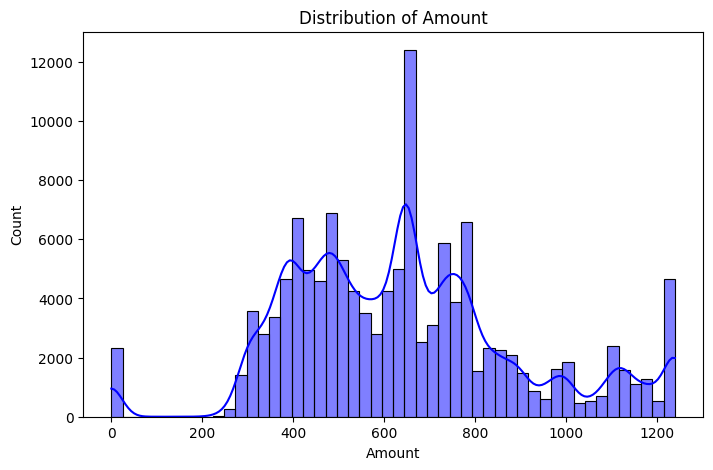

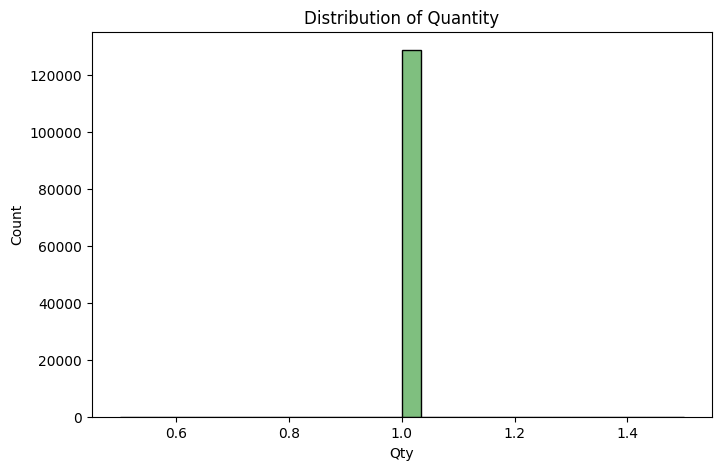

C:\Users\HP\AppData\Local\Temp\ipykernel_25244\3975341912.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index, palette='Set2')


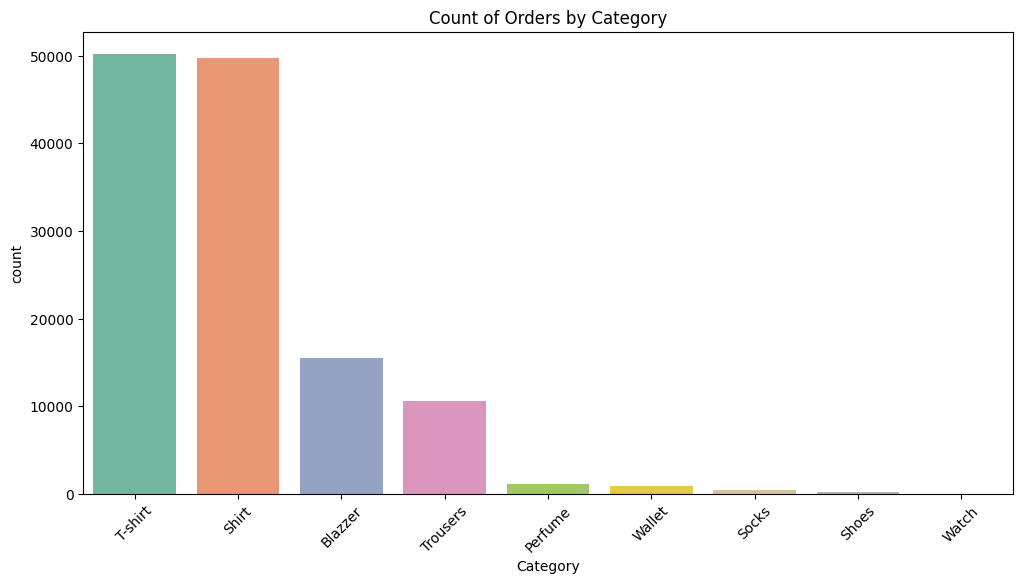

ValueError: could not convert string to float: '405-8078784-5731545'

<Figure size 1000x600 with 0 Axes>

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\HP\\Downloads\\Amazon Sale Report (1).csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Info:")
print(data.info())

# ====== Data Cleaning ======

# 1. Remove duplicate rows
data = data.drop_duplicates()
print(f"Number of duplicates removed: {data.duplicated().sum()}")

# 2. Handle missing values
missing_summary = data.isnull().sum()
print("\nMissing Values Summary:")
print(missing_summary)

# Impute missing numerical columns with mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)

# Impute missing categorical columns with mode
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Drop columns with all missing values (if any)
data = data.dropna(axis=1, how='all')

# 3. Outlier Handling (Capping)
# Use the IQR method to detect and cap outliers in numerical columns
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

for col in ['Amount', 'Qty']:  # Adjust based on your data
    cap_outliers(data, col)

# ====== Univariate Analysis ======
print("\nNumerical Summary:")
print(data.describe())

# Distribution of 'Amount'
plt.figure(figsize=(8, 5))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Amount')
plt.show()

# Distribution of 'Qty'
plt.figure(figsize=(8, 5))
sns.histplot(data['Qty'], bins=30, kde=True, color='green')
plt.title('Distribution of Quantity')
plt.show()

# Count plot for 'Category'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index, palette='Set2')
plt.title('Count of Orders by Category')
plt.xticks(rotation=45)
plt.show()

# ====== Bivariate Analysis ======
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot: 'Amount' vs 'Qty'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Qty', y='Amount', hue='Category', palette='Set1')
plt.title('Scatter Plot: Quantity vs Amount')
plt.show()

# Box plot: Amount by Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Category', y='Amount', palette='Set3')
plt.title('Box Plot of Amount by Category')
plt.xticks(rotation=45)
plt.show()

# Bar plot: Average Amount by Sales Channel
plt.figure(figsize=(8, 6))
avg_amount_by_channel = data.groupby('Sales Channel')['Amount'].mean().sort_values()
avg_amount_by_channel.plot(kind='bar', color='skyblue')
plt.title('Average Amount by Sales Channel')
plt.ylabel('Average Amount')
plt.xlabel('Sales Channel')
plt.show()

# Geographical analysis (if columns like 'ship-country' or 'ship-city' exist)
if 'ship-country' in data.columns:
    country_sales = data.groupby('ship-country')['Amount'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    country_sales[:10].plot(kind='bar', color='purple')
    plt.title('Top 10 Countries by Total Sales')
    plt.ylabel('Total Sales')
    plt.xlabel('Country')
    plt.show()

# Pairplot for numerical features
sns.pairplot(data[['Amount', 'Qty']], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# ====== Insights ======
# Print key insights
print("\nKey Insights:")
print("1. The most popular product category is:", data['Category'].mode()[0])
print("2. The average order amount is:", round(data['Amount'].mean(), 2))
print("3. The maximum quantity sold in a single transaction is:", data['Qty'].max())

# Save the cleaned data
data.to_csv('/mnt/data/cleaned_amazon_sales.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_amazon_sales.csv'.")
